## Exemplo de busca em largura
*   Construção do Grafo (Espaço de estados)
*   Considera a estrutura ListaAdj como um grafo direcionado



In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
# Fonte https://www.geeksforgeeks.org/visualize-graphs-in-python/
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

In [ ]:
def criaListaAdj_Arquivo(arq):
  # Opção de código para leitura diretamente do arquivo
  listaAdj = {} # para cada chave (cidade) é gerado um lista de adjacentes
  vizinhos = []
  dados = open(arq,"r")
  linha = dados.readline()
  while linha:
      valores = linha.split(",")
      if valores[0] in listaAdj:
        vizinhos = listaAdj.get(valores[0])
        vizinhos.append(valores[1])
        listaAdj[valores[0]] = vizinhos
      else:
        vizinhos = []
        listaAdj[valores[0]] = list()
        vizinhos.append(valores[1])
        listaAdj[valores[0]] = vizinhos    
      
      linha = dados.readline()

  dados.close()
  return listaAdj


In [7]:
# Construção manual do dicionário
def criaListaAdj(listaAdj):
  listaAdj = {}
  listaAdj = {
              'Arad': {'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118},
              'Zerind': {'Arad': 75, 'Oradea': 71},
              'Oradea': {'Zerind': 71, 'Sibiu': 151},
              'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},\
              'Timisoara': {'Arad': 118, 'Lugoj': 111},
              'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
              'Mehadia': {'Lugoj': 70, 'Dobreta': 75},
              'Dobreta': {'Mehadia': 75, 'Craiova': 120},
              'Craiova': {'Dobreta': 120, 'Rimnicu': 146, 'Pitesti': 138},
              'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
              'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
              'Pitesti': {'Rimnicu': 97, 'Craiova': 138, 'Bucharest': 101},
              'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
              'Giurgiu': {'Bucharest': 90},
              'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},
              'Hirsova': {'Urziceni': 98, 'Eforie': 86},
              'Eforie': {'Hirsova': 86},
              'Vaslui': {'Iasi': 92, 'Urziceni': 142},
              'Iasi': {'Vaslui': 92, 'Neamt': 87},
              'Neamt': {'Iasi': 87}
          }
  return listaAdj         

In [8]:
#Função Busca em Largura
def bfs(listaAdj, borda, visitados, cidade, objetivo, graph):  
  borda.append(cidade)
  
  while borda:
    print('>>>>> Visitados: ', visitados)
    print('>>>>> Fronteira: ', borda)
    s = borda.pop(0)
    print(">>>>> Entrou na cidade: ", s)
    visitados.append(s)
    if s == objetivo:
      break;    

    if s in listaAdj:
      for vizinho in listaAdj[s]:
        if vizinho not in visitados: 
          graph.addEdge(s, vizinho)
          graph.visualize()       
          borda.append(vizinho)

  return visitados                    

Pecurso iniciando em Arad
>>>>> Visitados:  []
>>>>> Fronteira:  ['Arad']
>>>>> Entrou na cidade:  Arad


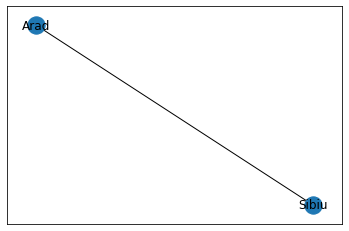

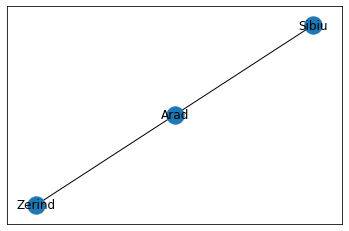

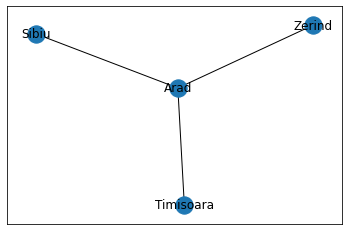

>>>>> Visitados:  ['Arad']
>>>>> Fronteira:  ['Sibiu', 'Zerind', 'Timisoara']
>>>>> Entrou na cidade:  Sibiu


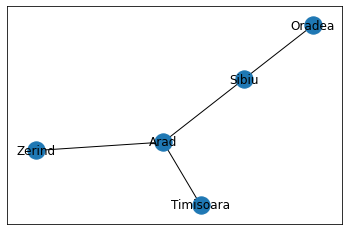

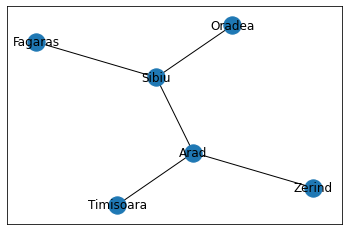

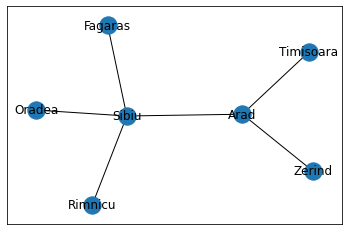

>>>>> Visitados:  ['Arad', 'Sibiu']
>>>>> Fronteira:  ['Zerind', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu']
>>>>> Entrou na cidade:  Zerind


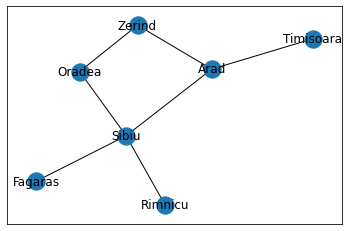

>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind']
>>>>> Fronteira:  ['Timisoara', 'Oradea', 'Fagaras', 'Rimnicu', 'Oradea']
>>>>> Entrou na cidade:  Timisoara


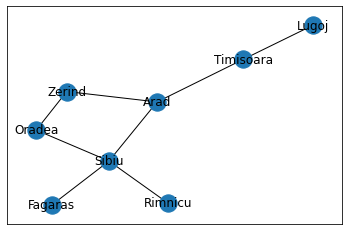

>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind', 'Timisoara']
>>>>> Fronteira:  ['Oradea', 'Fagaras', 'Rimnicu', 'Oradea', 'Lugoj']
>>>>> Entrou na cidade:  Oradea
>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind', 'Timisoara', 'Oradea']
>>>>> Fronteira:  ['Fagaras', 'Rimnicu', 'Oradea', 'Lugoj']
>>>>> Entrou na cidade:  Fagaras


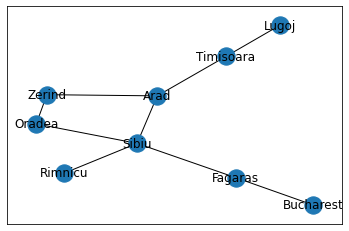

>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind', 'Timisoara', 'Oradea', 'Fagaras']
>>>>> Fronteira:  ['Rimnicu', 'Oradea', 'Lugoj', 'Bucharest']
>>>>> Entrou na cidade:  Rimnicu


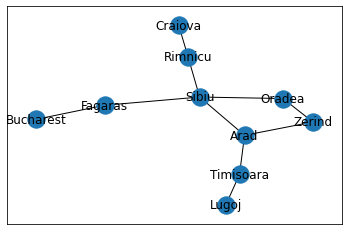

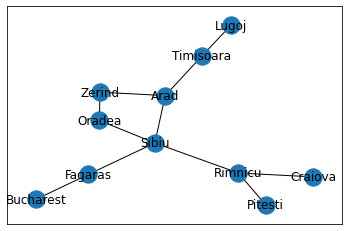

>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu']
>>>>> Fronteira:  ['Oradea', 'Lugoj', 'Bucharest', 'Craiova', 'Pitesti']
>>>>> Entrou na cidade:  Oradea
>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu', 'Oradea']
>>>>> Fronteira:  ['Lugoj', 'Bucharest', 'Craiova', 'Pitesti']
>>>>> Entrou na cidade:  Lugoj


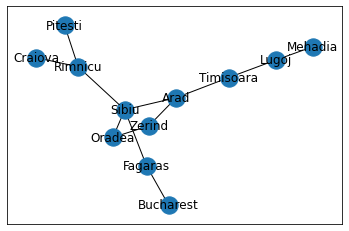

>>>>> Visitados:  ['Arad', 'Sibiu', 'Zerind', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu', 'Oradea', 'Lugoj']
>>>>> Fronteira:  ['Bucharest', 'Craiova', 'Pitesti', 'Mehadia']
>>>>> Entrou na cidade:  Bucharest
['Arad', 'Sibiu', 'Zerind', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu', 'Oradea', 'Lugoj', 'Bucharest']


In [9]:
# Configurção geral
G = GraphVisualization() #Grafo para salvar as arestas percorridas
listaA = {}
fronteira = []
visitados = []     #Inicializa a lista de visitados
# Gera a lista adjacencia
listaA = criaListaAdj(listaA)
#listaA = criaListaAdj_Arquivo("cidades.txt")
print("Pecurso iniciando em Arad")
visitados = bfs(listaA, fronteira, visitados, 'Arad', 'Bucharest', G )
print(visitados)